In [1]:
import numpy as np
import tensorflow as tf
sess=tf.Session()
x_vals=np.array([1.0,2.0,3.0,4.0,5.0])
x_data=tf.placeholder(tf.float32)
m_const=tf.constant(3.0)
my_product=tf.multiply(x_data,m_const)
for x_val in x_vals:
    print(sess.run(my_product,{x_data:x_val}))

3.0
6.0
9.0
12.0
15.0


In [2]:
my_array=np.array([[1.,3.,5.,7.,9.],[-2.,0.,2.,4.,6.,],[-6.,-3.,0.,3.,6.]])
x_vals=np.array([my_array,my_array+1])
x_data=tf.placeholder(tf.float32,shape=(3,5))
m1=tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2=tf.constant([[2.]])
m3=tf.constant([[10.]])
mul1=tf.matmul(x_data,m1)
mul2=tf.matmul(mul1,m2)
add=tf.add(mul2,m3)

for x_val in x_vals:
    print(sess.run(add,feed_dict={x_data:x_val}))

[[ 102.]
 [  66.]
 [  58.]]
[[ 114.]
 [  78.]
 [  70.]]


In [3]:
my_array=np.arange(16.0).reshape(4,4)
x_vals=np.array([my_array,my_array+1])
x_data=tf.placeholder(tf.float32,shape=(4,4))
m1=tf.constant([[1.,2.,3.,4.]])
m2=tf.constant([[1.],[0.],[-1.],[2.]])
m3=tf.constant(10.)
mul1=tf.matmul(m1,x_data)
mul2=tf.matmul(mul1,m2)
add=tf.add(mul2,m3)
for x_val in x_vals:
    print(sess.run(add,feed_dict={x_data:x_val}))

[[ 210.]]
[[ 230.]]


In [4]:
x_shape=[1,4,4,1]
x_val=np.random.uniform(size=x_shape)
x_val

array([[[[ 0.21558264],
         [ 0.40850969],
         [ 0.41026674],
         [ 0.0313275 ]],

        [[ 0.55905284],
         [ 0.78158572],
         [ 0.92708534],
         [ 0.61076113]],

        [[ 0.35007922],
         [ 0.32080952],
         [ 0.19681633],
         [ 0.98913511]],

        [[ 0.83993999],
         [ 0.45799935],
         [ 0.00216473],
         [ 0.85308049]]]])

In [5]:
# Tensorflow 实现损失函数
# L2损失函数，又称之为平方和损失函数
import matplotlib.pyplot as plt
x_val=tf.linspace(-1.,1.,500)
target=tf.constant(0.)
l2_y_vals=tf.square(target-x_val)
l2loss=sess.run(l2_y_vals)

In [6]:
# L1正则损失函数
l1_y_vals=tf.abs(target-x_val)
l1loss=sess.run(l1_y_vals)

In [7]:
# Pseudo-Huber loss function
delta1=tf.constant(0.25)
phloss1=tf.multiply(tf.square(delta1),tf.sqrt(1.0+tf.square((target-x_val)/delta1))-1.0)
delta1loss=sess.run(phloss1)

In [8]:
delta2=tf.constant(5.)
phloss2=tf.multiply(tf.square(delta2),tf.sqrt(1.0+tf.square((target-x_val)/delta2))-1.0)
delta2loss=sess.run(phloss2)

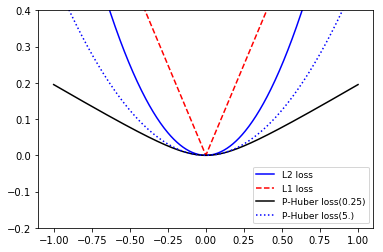

In [9]:
x=sess.run(x_val)
plt.plot(x,l2loss,'b-',label='L2 loss')
plt.plot(x,l1loss,'r--',label='L1 loss')
plt.plot(x,delta1loss,'k-',label='P-Huber loss(0.25)')
plt.plot(x,delta2loss,'b:',label='P-Huber loss(5.)')
plt.ylim(-0.2,0.4)
plt.legend(loc='lower right',prop={'size':9})
plt.show()
plt.close()

In [10]:
# 分类损失函数
x_vals=tf.linspace(-3.,5.,500)
target=tf.constant(1.)
targets=tf.fill([500,],1.)  #  黑科技，因为tf.fill([rnums,cnums],num)---这里将cnums设为空，代表生成一个长度为500的数组
#targets=tf.fill([1,500],1.) # 这个和上面是不一样的，这个本质上还是个多维的array

In [11]:
# Hinge loss function
hinge_loss_function=tf.maximum(0.,1.-tf.multiply(target,x_vals))
hingeloss=sess.run(hinge_loss_function)

In [12]:
# Cross_entropy loss function 两类交叉熵
crossentropy= -tf.multiply(target,tf.log(x_vals)) -tf.multiply((1.-target),tf.log(1.-x_vals))
crossentropyloss=sess.run(crossentropy)

In [13]:
# Sigmoid交叉熵
sigmoidcrossentropy=tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals,labels=targets)
sigmoidloss=sess.run(sigmoidcrossentropy)

In [14]:
weight=tf.constant(0.5)
weightcrossentroyloss=tf.nn.weighted_cross_entropy_with_logits(targets,x_vals,weight)
weightloss=sess.run(weightcrossentroyloss)

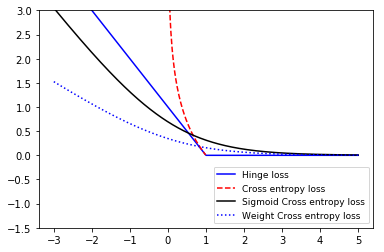

In [15]:
x=sess.run(x_vals)
plt.plot(x,hingeloss,'b-',label='Hinge loss ')
plt.plot(x,crossentropyloss,'r--',label='Cross entropy loss')
plt.plot(x,sigmoidloss,'k-',label='Sigmoid Cross entropy loss')
plt.plot(x,weightloss,'b:',label='Weight Cross entropy loss')
plt.ylim(-1.5,3.0)
plt.legend(loc='lower right',prop={'size':9})
plt.show()
plt.close()

In [29]:
import tensorflow as tf
import numpy as np
# tensorflow 实现反向传播
# 梯度下降算法
# 创建会话
sess=tf.Session()
# 生成数据和占位符以及变量
x_vals=np.random.normal(1,0.1,100)
y_vals=np.repeat(10.,100)
A=tf.Variable(np.array([1.],dtype=np.float32)) # A里面的东西是多少无所谓，重要的是格式要与下面对齐
# A也可以是tf.Variable(tf.random_normal(shape=[1]))
x_data=tf.placeholder(shape=[1],dtype=tf.float32)
y_target=tf.placeholder(shape=[1],dtype=tf.float32)
# 增加乘法操作
my_output=tf.multiply(x_data,A)
# L2 loss Function
loss=tf.square(my_output-y_target)
# initialize variables
init=tf.initialize_all_variables()
sess.run(init)
# 声明迭代器
my_opt=tf.train.GradientDescentOptimizer(learning_rate=0.02,)
train_step=my_opt.minimize(loss)
# 开始迭代
for i in range(100):
    rand_x=[x_vals[i]]
    rand_y=[y_vals[i]]  # 注意这里需要打上[],保证这里的格式与上面的占位符格式一致
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    print(sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y}))
    print(sess.run(A))

[ 75.75401306]
[ 1.34773457]
[ 71.76623535]
[ 1.66886902]
[ 66.00598907]
[ 1.98696721]
[ 59.25969696]
[ 2.30696583]
[ 58.73465347]
[ 2.59248281]
[ 57.89580917]
[ 2.85476375]
[ 55.40974808]
[ 3.1065855]
[ 41.06628799]
[ 3.39085793]
[ 36.89534378]
[ 3.66373897]
[ 28.17056656]
[ 3.93237638]
[ 26.77919006]
[ 4.18447065]
[ 31.06384468]
[ 4.41722822]
[ 27.19027328]
[ 4.64181328]
[ 24.29253006]
[ 4.85704327]
[ 19.37249565]
[ 5.06178951]
[ 21.65386963]
[ 5.25917959]
[ 16.8008976]
[ 5.44560623]
[ 17.54804611]
[ 5.62637806]
[ 16.20821953]
[ 5.79961205]
[ 25.85471344]
[ 5.97168398]
[ 8.70479774]
[ 6.11536598]
[ 16.70770454]
[ 6.27509069]
[ 11.91691113]
[ 6.42199039]
[ 12.25857353]
[ 6.56625271]
[ 23.30790329]
[ 6.71852827]
[ 13.99884987]
[ 6.85977316]
[ 9.53953934]
[ 6.98695946]
[ 11.11619282]
[ 7.11642408]
[ 16.58789062]
[ 7.25320673]
[ 17.16068459]
[ 7.38796949]
[ 4.7591753]
[ 7.48330212]
[ 2.20559502]
[ 7.55385065]
[ 7.42233467]
[ 7.66121435]
[ 3.33750606]
[ 7.7419591]
[ 3.1052258]
[ 7.8196644

In [26]:
# 两次计算之间要进行重置
from tensorflow.python.framework import  ops
ops.reset_default_graph()
# 新建一个图层
sess=tf.Session()
# 创建变量和数据
x_vals=np.concatenate((np.random.normal(-1,1,50),np.random.normal(3,1,50)))
y_vals=np.concatenate((np.repeat(0.,50),np.repeat(1.,50)))
x_data=tf.placeholder(shape=[1],dtype=tf.float32)
y_target=tf.placeholder(shape=[1],dtype=tf.float32)
A=tf.Variable(np.array([10.],dtype=np.float32))
# 转化函数
my_output=tf.add(x_data,A)
# 初始化
init=tf.initialize_all_variables()
sess.run(init)
# 构建损失函数
xentropy=tf.nn.sigmoid_cross_entropy_with_logits(labels=y_target,logits=my_output)
# 构建迭代函数
my_opt=tf.train.GradientDescentOptimizer(0.05)
train_step=my_opt.minimize(xentropy)
for i in range(2000):
    rand_index=np.random.choice(100)
    rand_x=[x_vals[rand_index]]
    rand_y=[y_vals[rand_index]]  # 注意这里需要打上[],保证这里的格式与上面的占位符格式一致
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    if i%200==0:
       print(sess.run(xentropy,feed_dict={x_data:rand_x,y_target:rand_y}))
       print(sess.run(A))

[  1.22012796e-06]
[ 10.]
[ 0.000842]
[ 5.12666988]
[ 0.00595928]
[ 0.92221272]
[ 0.23342586]
[-0.46155047]
[ 0.06578148]
[-0.92820847]
[ 0.20667773]
[-1.17383599]
[ 0.10399538]
[-1.07303071]
[ 0.13211007]
[-1.06271219]
[ 0.05044933]
[-1.21432185]
[ 0.13536093]
[-1.08633387]


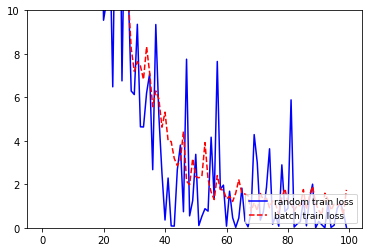

In [40]:
# 多批量数据的操作
# 两次计算之间要进行重置
from tensorflow.python.framework import  ops
ops.reset_default_graph()
# 新建一个图层
sess=tf.Session()
# 批量大小
batch_size=20
# 声明数据，占位符和变量
x_vals=np.random.normal(1.,0.1,100)
y_vals=np.repeat(10.,100)
x_data=tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
A=tf.Variable(tf.random_normal([1,1]))
# 声明数据
my_output=tf.matmul(x_data,A)
# 声明loss function---这里的loss不一定非要用mean用sum也可以
loss=tf.reduce_mean(tf.square(my_output-y_target))
# 变量初始化
init=tf.initialize_all_variables()
sess.run(init)
# 声明迭代器
my_opt=tf.train.GradientDescentOptimizer(0.02)
train=my_opt.minimize(loss)
# 初始化保存器
loss_batch=[]
# 开始迭代
for i in range(100):
    rand_index=np.random.choice(100,size=batch_size)
    rand_x=np.transpose([x_vals[rand_index]])
    rand_y=np.transpose([y_vals[rand_index]])
    sess.run(train,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_batch.append(sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y}))
# 随机训练---单次
B=tf.Variable(np.array([1.],dtype=np.float32)) # A里面的东西是多少无所谓，重要的是格式要与下面对齐
# A也可以是tf.Variable(tf.random_normal(shape=[1]))
x_data2=tf.placeholder(shape=[1],dtype=tf.float32)
y_target2=tf.placeholder(shape=[1],dtype=tf.float32)
# 增加乘法操作
my_output2=tf.multiply(x_data2,B)
# L2 loss Function
loss2=tf.square(my_output2-y_target2)
# initialize variables
init=tf.initialize_all_variables()
sess.run(init)
# 声明迭代器
my_opt2=tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step=my_opt.minimize(loss2)
# 声明保存器
loss_list=[]
# 开始迭代
for i in range(100):
    rand_index=np.random.choice(100)
    rand_x=[x_vals[rand_index]]
    rand_y=[y_vals[rand_index]]  # 注意这里需要打上[],保证这里的格式与上面的占位符格式一致
    sess.run(train_step,feed_dict={x_data2:rand_x,y_target2:rand_y})
    loss_list.append(sess.run(loss2,feed_dict={x_data2:rand_x,y_target2:rand_y}))
import matplotlib.pyplot  as  plt
x=np.arange(100)
plt.plot(x,loss_list,'b-',label='random train loss')
plt.plot(x,loss_batch,'r--',label='batch train loss')
plt.ylim(0,10)
plt.legend(loc='lower right',prop={'size':9})
plt.show()
plt.close()
# 从下图可以看出，batch train 可以更快的收敛，但是训练占用的内存较大，
# 而random train占用资源较少

In [28]:
# Tensorflow 创建一个分类器


Help on function reduce_sum in module tensorflow.python.ops.math_ops:

reduce_sum(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
    Computes the sum of elements across dimensions of a tensor.
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keep_dims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keep_dims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` has no entries, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[1, 1, 1], [1, 1, 1]])
    tf.reduce_sum(x)  # 6
    tf.reduce_sum(x, 0)  # [2, 2, 2]
    tf.reduce_sum(x, 1)  # [3, 3]
    tf.reduce_sum(x, 1, keep_dims=True)  # [[3], [3]]
    tf.reduce_sum(x, [0, 1])  # 6
    ```
    
    Args:
      input_tensor: The tensor to reduce. Should have numeric type.
      axis: The dimensions to reduce. If `None` (th